In [2]:
import pypyodbc as podbc
import pandas as pd
import numpy as np

# DB Connection 
conn=podbc.connect("Driver={SQL Server};Server=localhost,1433;Database=APPWMS;uid=sa;pwd=sa2019")

#wh
query = """select wh_id,
        adr_id
   from wh"""
#dataframe invtyp
wh = pd.read_sql(query, conn)

#wh
query = """select client_id,
        adr_id
   from client"""
#dataframe invtyp
client = pd.read_sql(query, conn)

#Invtyp master
query = """select colval,
        lngdsc,
        short_dsc
   from dscmst
  where colnam = 'invtyp'
    and locale_id = 'ES-ES'"""
#dataframe invtyp
invtyp = pd.read_sql(query, conn)

#trlr_stat master
query = """select colval,
        lngdsc,
        short_dsc
   from dscmst
  where colnam = 'trlr_stat'
    and locale_id = 'ES-ES'"""
#dataframe trlr_stat
trlr_stat = pd.read_sql(query, conn)

#rcvtrk_stat master
query = """select colval,
        lngdsc,
        short_dsc
   from dscmst
  where colnam = 'rcvtrk_stat'
    and locale_id = 'ES-ES'"""
#dataframe rcvtrk_stat
rcvtrk_stat = pd.read_sql(query, conn)
print("Data Load")


Data Load


In [3]:
#receive data for trlr_cod equal to 'RCV'
query = """select trlr_id,
        carcod,
        trlr_num,
        trlr_stat,
        arrdte,
        close_dte,
        dispatch_dte
   from trlr
  where trlr_cod = 'RCV'"""
#dataframe 
trlr = pd.read_sql(query, conn)

#rcvtrk data
query = """select trlr_id,
        trknum,
        wh_id,
        rcvtrk_stat,
        clsdte
   from rcvtrk"""
#dataframe 
rcvtrk = pd.read_sql(query, conn)

#rcvlin
query = """select trknum,
        client_id,
        invnum,
        sum(expqty) expqty,
        sum(idnqty) idnqty,
        sum(rcvqty) rcvqty
   from rcvlin
  group by trknum,
        client_id,
        invnum"""
#dataframe 
rcvlin = pd.read_sql(query, conn)

#rcvinv
query = """select trknum,
        client_id,
        invnum,
        wh_id,
        invtyp,
        po_num
   from rcvinv"""
#dataframe 
rcvinv = pd.read_sql(query, conn)

#rimhdr
query = """select client_id,
        invnum,
        wh_id,
        invtyp,
        rimsts
   from rimhdr"""
#dataframe 
rimhdr = pd.read_sql(query, conn)

#rimlin
query = """select client_id,
        invnum,
        invlin,
        prtnum,
        wh_id,
        expqty,
        idnqty
   from rimlin"""
#dataframe 
rimlin = pd.read_sql(query, conn)
print("Data Load")

Data Load


In [17]:
trlr_rcvtrk = trlr.merge(rcvtrk,on='trlr_id').merge(rcvlin,on='trknum')

In [38]:
result_rcv = trlr_rcvtrk[(pd.notnull(trlr_rcvtrk['arrdte']))][['trlr_id','trknum','wh_id','client_id','arrdte','expqty','idnqty','rcvqty']].sort_values(['expqty'],ascending=False)

,trlr_id,trknum,wh_id,client_id,arrdte,expqty,idnqty,rcvqty
188,TRL0000265,LD4001,WMD1,----,2013-04-08 15:40:22,28800,4050,4050
85,TRL0000173,CLBILLTRUCK,WMD1,CLIENTA,2016-08-24 07:00:00,20000,356,356
189,TRL0000267,LD4002,WMD1,CLIENTA,2016-08-24 07:00:00,19080,450,0
136,TRL0000246,1 01,WMD1,----,2016-08-23 07:00:00,18000,0,0
0,TRL0000093,INVTRUCK2,WMD1,----,2004-05-20 09:01:53,5000,360,1010
196,TRL0000287,FLT-SHIP2,WMD1,CLIENTA,2018-05-31 09:31:25,3000,3000,3000
192,TRL0000270,HOTRCPT01,WMD1,CLIENTA,2016-08-23 07:00:00,2640,0,0
120,TRL0000198,18QA,WMD1,----,2016-08-23 07:00:00,2400,0,0
121,TRL0000198,18QA,WMD1,----,2016-08-23 07:00:00,2400,3200,3200
134,TRL0000246,1 01,WMD1,----,2016-08-23 07:00:00,2400,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000155E11E9088>]],
      dtype=object)

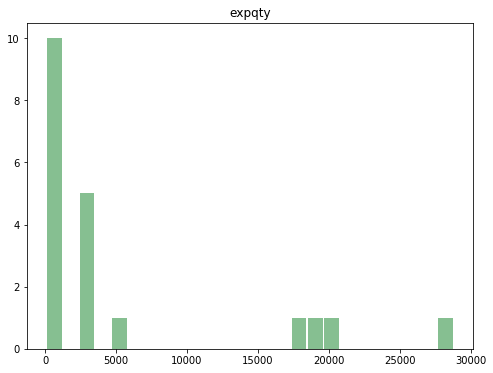

In [52]:
result_rcv.hist(column='expqty',bins=25, grid=False, figsize=(8,6), color='#86bf91', zorder=4, rwidth=0.9)